In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [2]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [40]:
standard_df = df[df['Subscription_Type'] == 'Standard']
premium_df = df[df['Subscription_Type'] == 'Premium']
basic_df = df[df['Subscription_Type'] == 'Basic']




In [5]:
print(standard_df.info())
print(standard_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 1 to 998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  530 non-null    int64  
 1   Age                      530 non-null    int64  
 2   Gender                   530 non-null    object 
 3   Location                 530 non-null    object 
 4   Subscription_Start_Date  530 non-null    object 
 5   Subscription_Type        530 non-null    object 
 6   Monthly_Payment          530 non-null    float64
 7   Payment_Method           530 non-null    object 
 8   Monthly_Hours_Watched    530 non-null    float64
 9   Favorite_Genre           530 non-null    object 
 10  Devices_Used             530 non-null    object 
 11  Average_Session_Length   530 non-null    float64
 12  Content_ID               530 non-null    int64  
 13  Rating_Given             530 non-null    int64  
 14  Churned                  530 no

In [8]:
#Converting Sub Start Date as Date/Time
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])

In [9]:
print(df['Subscription_Start_Date'].head())

0   2020-06-07 01:53:37.656934
1   2024-02-21 01:53:37.656980
2   2022-10-06 01:53:37.656995
3   2022-01-04 01:53:37.657006
4   2020-03-13 01:53:37.657017
Name: Subscription_Start_Date, dtype: datetime64[ns]


In [28]:
#Creating a year and quarter column
df['year'] = df['Subscription_Start_Date'].dt.year
df['quarter'] = df['Subscription_Start_Date'].dt.quarter

# Create a 'year_quarter' column for grouping
df['year_quarter'] = df['year'].astype(str) + ' Q' + df['quarter'].astype(str)


print(df[['Subscription_Start_Date','year', 'quarter', 'year_quarter']].head())

     Subscription_Start_Date  year  quarter year_quarter
0 2020-06-07 01:53:37.656934  2020        2      2020 Q2
1 2024-02-21 01:53:37.656980  2024        1      2024 Q1
2 2022-10-06 01:53:37.656995  2022        4      2022 Q4
3 2022-01-04 01:53:37.657006  2022        1      2022 Q1
4 2020-03-13 01:53:37.657017  2020        1      2020 Q1


In [29]:
#Churn Rate Calculation Function
def churn_rate(group):
    churned = group['Churned'].sum()
    total = group['Churned'].count()
    return (churned/total) * 100

In [42]:
churn_rate_by_Q_S = standard_df.groupby('year_quarter').apply(churn_rate).reset_index(name='churn_rate')

churn_rate_by_Q_P = premium_df.groupby('year_quarter').apply(churn_rate).reset_index(name='churn_rate')

churn_rate_by_Q_B = basic_df.groupby('year_quarter').apply(churn_rate).reset_index(name='churn_rate')

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_43949/1078301004.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  churn_rate_by_Q_S = standard_df.groupby('year_quarter').apply(churn_rate).reset_index(name='churn_rate')
/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_43949/1078301004.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  churn_rate_by_Q_P = premium_df.groupby('year_quar

In [45]:
print(churn_rate_by_Q_S)

   year_quarter  churn_rate
0       2019 Q2   13.636364
1       2019 Q3   22.580645
2       2019 Q4   33.333333
3       2020 Q1   18.518519
4       2020 Q2   25.000000
5       2020 Q3   28.571429
6       2020 Q4   34.615385
7       2021 Q1   28.571429
8       2021 Q2   41.176471
9       2021 Q3    4.000000
10      2021 Q4   16.129032
11      2022 Q1   19.230769
12      2022 Q2   35.000000
13      2022 Q3   20.000000
14      2022 Q4   16.666667
15      2023 Q1   19.354839
16      2023 Q2   28.571429
17      2023 Q3   12.500000
18      2023 Q4   25.925926
19      2024 Q1   21.428571
20      2024 Q2   10.000000


<function matplotlib.pyplot.show(close=None, block=None)>

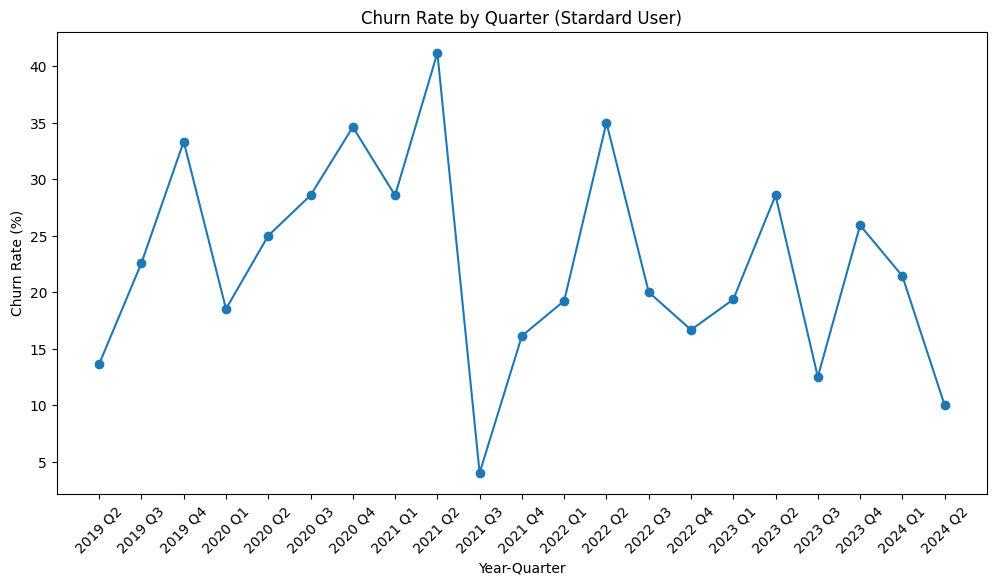

In [81]:
#Plot Churn Rate for Standard Users
plt.figure(figsize=(12, 6))
plt.plot(churn_rate_by_Q_S['year_quarter'], churn_rate_by_Q_S['churn_rate'], marker='o')

plt.title('Churn Rate by Quarter (Stardard User)')
plt.xlabel('Year-Quarter')
plt.ylabel('Churn Rate (%)')

plt.xticks(rotation=45)

plt.grid=True

plt.tight_layout
plt.show

In [ ]:
#PLot Churn rate for all users total


In [50]:
#Calculate average chrun rate
churn_rate_by_subscription = df.groupby(['year_quarter', 'Subscription_Type']).apply(churn_rate).reset_index(name='churn_rate')
average_churn_rate = churn_rate_by_subscription.groupby('year_quarter')['churn_rate'].mean().reset_index(name='average_churn_rate')
print(average_churn_rate)

   year_quarter  average_churn_rate
0       2019 Q2           19.545455
1       2019 Q3           26.494334
2       2019 Q4           21.111111
3       2020 Q1           37.517869
4       2020 Q2           23.771930
5       2020 Q3           22.301587
6       2020 Q4           31.260684
7       2021 Q1           29.716117
8       2021 Q2           25.121502
9       2021 Q3           11.055556
10      2021 Q4           22.310390
11      2022 Q1           28.434066
12      2022 Q2           20.132275
13      2022 Q3           29.423077
14      2022 Q4           17.676768
15      2023 Q1           24.705581
16      2023 Q2           19.874687
17      2023 Q3           29.722222
18      2023 Q4           30.308642
19      2024 Q1           24.404762
20      2024 Q2            8.888889


/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_43949/3217097487.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  churn_rate_by_subscription = df.groupby(['year_quarter', 'Subscription_Type']).apply(churn_rate).reset_index(name='churn_rate')


<function matplotlib.pyplot.show(close=None, block=None)>

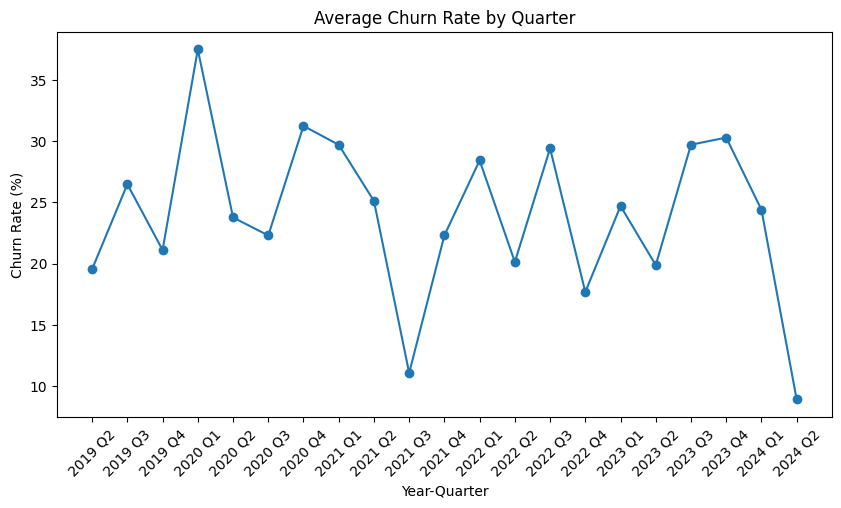

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(average_churn_rate['year_quarter'], average_churn_rate['average_churn_rate'],marker='o')

plt.title('Average Churn Rate by Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Churn Rate (%)')

plt.xticks(rotation=45)

plt.grid=True

plt.tight_layout
plt.show

In [72]:
#Isolate for 2021 Q2

standard_2021_q2c = df[(df['year_quarter'] == '2021 Q2') & (df['Churned'] == 1)]


In [73]:
print(standard_2021_q2c.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 12 to 966
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User_ID                  18 non-null     int64         
 1   Age                      18 non-null     int64         
 2   Gender                   18 non-null     object        
 3   Location                 18 non-null     object        
 4   Subscription_Start_Date  18 non-null     datetime64[ns]
 5   Subscription_Type        18 non-null     object        
 6   Monthly_Payment          18 non-null     float64       
 7   Payment_Method           18 non-null     object        
 8   Monthly_Hours_Watched    18 non-null     float64       
 9   Favorite_Genre           18 non-null     object        
 10  Devices_Used             18 non-null     object        
 11  Average_Session_Length   18 non-null     float64       
 12  Content_ID               18 non-null     

In [74]:
standard_2021_q2 = df[df['year_quarter'] == '2021 Q2']

In [76]:
standard_2021_q2.describe()

,User_ID,Age,Subscription_Start_Date,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned,year,quarter
count,56.000000,56.000000,56,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.0
mean,540.303571,47.375000,2021-05-11 21:36:29.091475456,15.347143,16.194119,1.866084,1043.232143,2.857143,0.321429,2021.0,2.0
min,13.000000,18.000000,2021-04-02 01:53:37.658952,9.990000,0.041574,0.004700,1000.000000,1.000000,0.000000,2021.0,2.0
25%,323.750000,37.000000,2021-04-18 19:53:37.664788736,14.990000,4.909054,0.366759,1019.750000,2.000000,0.000000,2021.0,2.0
50%,567.500000,48.500000,2021-05-07 13:53:37.661603840,14.990000,12.340062,1.591239,1043.000000,2.000000,0.000000,2021.0,2.0
75%,743.750000,58.000000,2021-06-04 19:53:37.665110272,14.990000,19.411580,2.834338,1065.250000,4.000000,1.000000,2021.0,2.0
max,967.000000,70.000000,2021-06-29 01:53:37.667189,19.990000,74.665845,7.461083,1091.000000,5.000000,1.000000,2021.0,2.0
std,261.082496,14.272112,NaN,3.141676,16.206480,1.676002,27.465013,1.419713,0.471251,0.0,0.0


In [77]:
df['Churned'].count()

1000

In [80]:
df['Churned'].describe()

count    1000.000000
mean        0.246000
std         0.430894
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churned, dtype: float64

In [ ]:
df['churned_rate'] = 